Khofiyya Mulia Rahmi

# Introduction

Pada kasus ini, saya akan menganalisa data Disaster Respon Massage dari tweet, yang dimana data ini berupa data text yang berisi respon-respon, dan kumpulan kalimat ini mempunyai labeling 1 jika terkait dengan bencana dan 0 jika tidak. 


Pada Kasus ini untuk bisa menghasilkan model yang melakukan tugas klasifikasi untuk memutuskan apakah tweet terkait dengan bencana atau tidak, dan dalam kasus ini terbagi menjadi 3 data tentang Disaster Respon Message , yang dimana untuk melakukan building model dengan dengan Data Disaster Respon message dan data Disaster Respon message validasi, dan untuk melihat model yang baik dengan Data Disaster Respon Testing. 

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
train = pd.read_csv('disaster_response_messages_training.csv')
test = pd.read_csv('disaster_response_messages_test.csv')
val = pd.read_csv('disaster_response_messages_validation.csv')

/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Loading

Memanggil data yang dibutuhkan

In [3]:
train_data = train[['message', 'aid_related']]
test_data = test[['message','aid_related']]
val_data = val [['message','aid_related']]
train_data.head()

,message,aid_related
0,Weather update - a cold front from Cuba that c...,0
1,Is the Hurricane over or is it not over,1
2,"says: west side of Haiti, rest of the country ...",0
3,Information about the National Palace-,0
4,Storm at sacred heart of jesus,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21046 entries, 0 to 21045
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   message      21046 non-null  object
 1   aid_related  21046 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 329.0+ KB


Terdapat 2 feature,yaitu message yang berisi kumpulan kalimat dan aid_related yang dimana terdapt labelin 1 untuk bencana 2 untuk tidak , type data adalah object dan int6, dan terdapat sebanyak 21046 data.

In [5]:
train_data.aid_related.value_counts()

0    12361
1     8685
Name: aid_related, dtype: int64

/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aid_related', ylabel='count'>

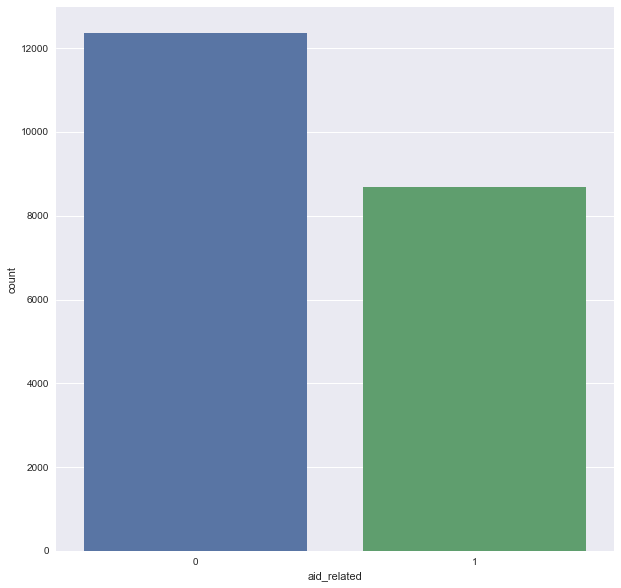

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(train_data['aid_related'])

Dalam kasus ini, dari total ulasan sebanyak 21046 data, berdasarkan histogram di atas, hasil pelabelan kelas menunjukkan bahwa jumlah kalimat disaster_respon_message tidak bencana memiliki frekuensi yang lebih tinggi dibandingkan dengan jumlah ucapan bencana seperti di tampilan histogram di atas.


Untuk selanjutnya, Data disaster_respon_message merupakan data berupa teks yang memiliki bentuk data tidak struktur, karena masih terdapat banyak noise pada data dan informasi yang terdapat didalamnya akan sulit diekstrak secara langsung. Oleh sebab itu, data harus di seleksi terlebih dahulu agar lebih terstruktur dan memiliki keseragaman, sehingga akan mempermudah proses analisis dan ekstraksi informasi yang terkandung didalamnya.

Pada tahap preprocessing, akan dilakukan pembersihan data menggunakan metode text mining. Beberapa tahap yang akan dilakukan diantaranya adalah cleansing remove punctuation,stopwrod, steaming yang akan dijelaskan berikut:

# PreProcessing

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# 1. Remove Punctuation

Menghapus tanda baca seperti [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~] dapat dilakukan di pyhton seperti dibawah ini :

In [8]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [9]:
train_data['message'] = train_data['message'].apply(remove_punctuation)
train_data.head(10)

<ipython-input-9-898152a9819d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['message'] = train_data['message'].apply(remove_punctuation)


,message,aid_related
0,Weather update a cold front from Cuba that co...,0
1,Is the Hurricane over or is it not over,1
2,says west side of Haiti rest of the country to...,0
3,Information about the National Palace,0
4,Storm at sacred heart of jesus,0
5,Please we need tents and water We are in Silo ...,1
6,I would like to receive the messages thank you,0
7,Theres nothing to eat and water we starving an...,1
8,I am in Petionville I need more information re...,0
9,I am in Thomassin number 32 in the area named ...,1


# 2. Stopwords

Tahapan stopword adalah proses mengahpus kata-kata yang dianggap tidak penting dan tidak berpengaruh terhadap proses kategorisasi. 


In [10]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw);

In [11]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in word_tokenize(text) if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [12]:
train_data['message'] = train_data['message'].apply(stopwords)
train_data.head(10)

<ipython-input-12-f1b140c0aa1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['message'] = train_data['message'].apply(stopwords)


,message,aid_related
0,weather update cold front cuba could pass haiti,0
1,hurricane,1
2,says west side haiti rest country today tonight,0
3,information national palace,0
4,storm sacred heart jesus,0
5,please need tents water silo thank,1
6,would like receive messages thank,0
7,theres nothing eat water starving thirsty,1
8,petionville need information regarding 4636,0
9,thomassin number 32 area named pyron would lik...,1


# 3. Stemming operations

Proses dimana proses menghilangkan kata-kata yang tidak penting dalam teks namun sering meuncul yang tidak memiliki pengaruh apapun.

In [13]:
# create an object of stemming function
stemmer = PorterStemmer()

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in word_tokenize(text)]
    return " ".join(text) 

In [14]:
train_data['message'] = train_data['message'].apply(stemming)
train_data.head(10)

<ipython-input-14-b8e45be93ad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['message'] = train_data['message'].apply(stemming)


,message,aid_related
0,weather updat cold front cuba could pass haiti,0
1,hurrican,1
2,say west side haiti rest countri today tonight,0
3,inform nation palac,0
4,storm sacr heart jesu,0
5,pleas need tent water silo thank,1
6,would like receiv messag thank,0
7,there noth eat water starv thirsti,1
8,petionvil need inform regard 4636,0
9,thomassin number 32 area name pyron would like...,1


# TF-IDF

Term Frequency Inverse Document Frequency (TF-IDF) merupakan sebuah metode pembobotan yang dilakukan untuk ekstraksi data teks. Skor TF-IDF mewakili kepentingan relatif suatu istilah dalam dokumen. Metode TF-IDF dilakukan dengan menghitung bobot dengan cara integrasi antara term frequency (tf) dan inverse document frequency (idf).

In [15]:
vectorizer = TfidfVectorizer(analyzer='word', binary=True, stop_words='english')
vectorizer.fit(train_data['message'])

TfidfVectorizer(binary=True, stop_words='english')

In [16]:
X = vectorizer.transform(train_data['message']).todense()
y = train['aid_related'].values
X.shape, y.shape

((21046, 26926), (21046,))

# Modeling

Analisis yang dilakukan pada penelitian ini pada prinsipnya adalah melakukan perbandingan beberapa metode machine learning untuk pengklasifikasian teks dengan fitur yang berbeda dengan memasukan Data Disaster Respon Message Train.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

1. logistic Regression

Regresi logistik mengukur hubungan antara variabel dependen kategorik dan satu atau lebih variabel independen dengan memperkirakan probabilitas menggunakan fungsi logistik/sigmoid. Saya menerapkan model Logistic Regression dengan menggunakan implementasi sklearn dari program jupyter

In [18]:
model1 = LogisticRegression(C=1.0, random_state=111)
model1.fit(X,y)

/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LogisticRegression(random_state=111)

2. SVM

Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang diawasi yang dapat digunakan untuk tantangan klasifikasi atau regresi. Model mengekstrak hyper-plane / line terbaik yang memisahkan dua kelas. Saya menentukan pembobot parameter pada SVM yaitu cost (c=1.0), dengan fungsi kernel “linear” , dan gamma otomatis atau default.

In [19]:
model2= LinearSVC()
model2.fit(X,y)

/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearSVC()

# Evaluate the model

Tahap evaluasi dilakukan untuk mengukur performa dari klasifikasi. Performa model dilihat dengan menggunakan confusion matrix dengan Data Disaster Respon Message Validation

In [20]:
val_data['aid_related']

0       0
1       1
2       0
3       1
4       0
       ..
2568    1
2569    0
2570    1
2571    0
2572    0
Name: aid_related, Length: 2573, dtype: int64

In [21]:
X_Val = vectorizer.transform(val_data['message']).todense()
y_pred = model1.predict(X_Val)

print(classification_report(val_data['aid_related'], y_pred))
print(confusion_matrix(val_data['aid_related'], y_pred))


/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

           0       0.70      0.90      0.78      1525
           1       0.74      0.43      0.54      1048

    accuracy                           0.71      2573
   macro avg       0.72      0.66      0.66      2573
weighted avg       0.72      0.71      0.69      2573

[[1372  153]
 [ 601  447]]


In [22]:
X_Val = vectorizer.transform(val_data['message']).todense()
y_pred = model2.predict(X_Val)

print(classification_report(val_data['aid_related'], y_pred))
print(confusion_matrix(val_data['aid_related'], y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1525
           1       0.70      0.46      0.55      1048

    accuracy                           0.70      2573
   macro avg       0.70      0.66      0.66      2573
weighted avg       0.70      0.70      0.68      2573

[[1318  207]
 [ 571  477]]


/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


# Prediction and Submition

Disini, adalalah proses melihat hasil prediksi dengan di bandingkan Data Disaster Respon Message Testing

In [26]:
X_test = test_data['message']
test_X = vectorizer.transform(X_test).todense()

Model 1 (Logistic Regression)

In [27]:
lr_pred = model1.predict(test_X)

/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [29]:
test_data['Hasil Prediksi1'] = lr_pred
test_data.head()

<ipython-input-29-d2b99948b1c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Hasil Prediksi1'] = lr_pred


,message,aid_related,Hasil Prediksi1
0,UN reports Leogane 80-90 destroyed. Only Hospi...,1,0
1,We are at Gressier we needs assistance right a...,1,0
2,"Delmas 33 in Silo, need water.",1,1
3,"SOS SOS, please provide police officers on the...",1,0
4,"I am a driver, a mechanic ,. I want to help",0,0


Model 2 (SVM)

In [30]:
lr_pred = model2.predict(test_X)

/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [31]:
test_data['Hasil Prediksi2'] = lr_pred
test_data.head()

<ipython-input-31-d070d498d176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Hasil Prediksi2'] = lr_pred


,message,aid_related,Hasil Prediksi1,Hasil Prediksi2
0,UN reports Leogane 80-90 destroyed. Only Hospi...,1,0,1
1,We are at Gressier we needs assistance right a...,1,0,0
2,"Delmas 33 in Silo, need water.",1,1,1
3,"SOS SOS, please provide police officers on the...",1,0,0
4,"I am a driver, a mechanic ,. I want to help",0,0,0


Dari hasil di atas, kita ambil salah satu contoh data teratas yaitu Data nomor 0 bahwa :

1. Hasil Prediksi 1 dengan menggunkan Logistic Regression yang dimana data actual mendapat labeling 1 yang artinya bencana tetapi didapatkan bahwa hasil prediksi yaitu 0 yang artinya tidak.

2. Hasil Prediksi 2 dengan menggunkan SVM yang dimana data actual mendapat labeling 1 yang artinya bencana untuk hasil prediksi benar bencana.

# Kesimpulan

Sebelumnya telah ditunjukan bahwa metode Logistic Regression merupakan metode klasifikasi dengan nilai akurasi tertinggi sebesar 71% dalam mengkalsfikasikan Disater respon message   dengan kategori bencana dan tidak.

Pada output tersebut menerangkan hasil ukuran evaluasi model terbaik berdasarkan perbandingan model yang digunakan. Nilai akurasi dari hasil klasifikasi pada data uji didapatkan sebesar 71%, artinya ketepatan model dalam memprediksi baik kelas bencana maupun tidak sebesar 71% yang dapat diinterpretasikan bahwa model klasifikasi dengan metode Logistic Regression dengan menggunakan merupakan model klasifikan Disaster respon message merupakan model klasifikasi yang baik untuk digunakan mengklasifikasikan disaster respon message.

# Thankyou